In [1]:
import pandas as pd
import re

In [2]:
f=open("cldk.txt","r",encoding='UTF-8')
lines=f.readlines()
f.close()

* 치아, 호흡 , 혈액 , 투석 관련 데이터들만 따로 뽑아서 cldk라는 데이터셋 생성

In [25]:
#lines[:10]- 공개불가

In [5]:
type(lines)

list

In [6]:
from konlpy.tag import Hannanum
hannanum=Hannanum()

In [16]:
dataset = []

for i in range(len(lines)):
    dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]', '',lines[i])))

In [22]:
##print(dataset[3]) - 공개 불가

## ## ############ 불용어 제거


In [18]:
stop=['등','수','것']

In [19]:
for i in range(len(dataset)):
    for j in range(len(dataset[i])):
        for k in stop :
            if k in dataset[i]:
                dataset[i].remove(k)

In [23]:
##print(dataset[3]) - 공개 불가

## ########## 불용어 제거 완료

In [21]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

* mlxtend를 이용해서 각 문장에 단어들의 포함 유무를 False, True로 표시

In [45]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)

In [46]:
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True, False],
       [False, False, False, ..., False, False, False]])

In [47]:
df=pd.DataFrame(te_ary,columns=te.columns_)

In [73]:
###df

* 지지도 계산 - 즉 각 리스트에 해당 단어가 포함된 정도

In [72]:
itemset = apriori(df,min_support=0.5, use_colnames=True)
###itemset[:2]

In [71]:
###itemset[333:335]

In [41]:
itemset.to_csv('as.csv',encoding='EUC-KR')

In [70]:
from mlxtend.frequent_patterns import association_rules

a= association_rules(itemset, metric="confidence", min_threshold=0.05) 
type(a)
###a

pandas.core.frame.DataFrame

In [52]:
a.to_csv('asd12.csv',encoding='EUC-KR')

In [53]:
from apyori import apriori

In [69]:
from mlxtend.frequent_patterns import association_rules

a= association_rules(itemset, metric="confidence", min_threshold=0.001) 
type(a)
###a

pandas.core.frame.DataFrame

In [68]:
result=(list(apriori(dataset, min_support=0.5)))
df=pd.DataFrame(result)


df['length']=df['items'].apply(lambda x:len(x))
df=df[(df['length']==2)&
     (df['support']>=0.5)].sort_values(by='support',ascending=False)
###df

In [67]:
###df[:92]

In [57]:
df.to_csv('조합.csv',encoding='EUC-KR')

In [58]:
import networkx as nx

In [59]:
import numpy as np

In [60]:
G=nx.Graph()
ar=(df['items']); G.add_edges_from(ar)

In [61]:
pr=nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000*(nsize-min(nsize)) / (max(nsize)-min(nsize))

In [62]:
pos = nx.circular_layout(G)

In [63]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

In [64]:
%matplotlib inline

In [65]:
import matplotlib.font_manager as fm

from matplotlib import rc

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

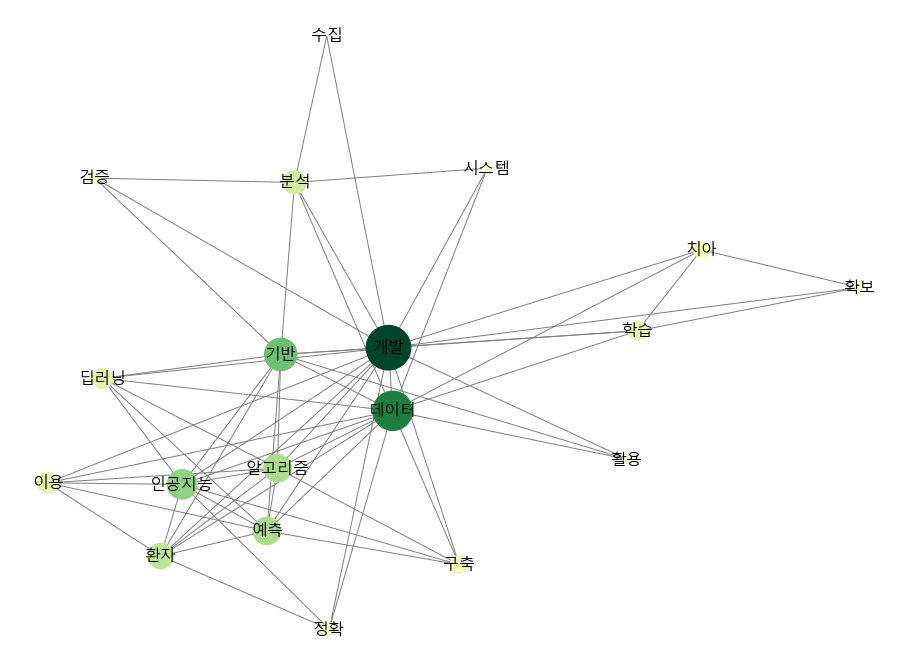

In [66]:
plt.figure(figsize=(16,12)); plt.axis('off')
pos = nx.spring_layout(G)

nx.draw_networkx(G, font_family='Malgun Gothic', font_size=16,
                pos=pos, node_color=list(pr.values()),node_size=nsize,
                alpha=1, edge_color='.5',cmap=plt.cm.YlGn)
plt.savefig('img.png',bbox_inches='tight')